In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
data = 'data/calories_data_entry.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,LineId,Time,Content,EventId,Date
0,9,2017-12-23 22:15:29.645,calculateCaloriesWithCache totalCalories=126775,E4,2017-12-23
1,18,2017-12-23 22:15:29.959,calculateCaloriesWithCache totalCalories=126797,E4,2017-12-23
2,25,2017-12-23 22:15:30.639,calculateCaloriesWithCache totalCalories=126818,E4,2017-12-23
3,32,2017-12-23 22:15:31.157,calculateCaloriesWithCache totalCalories=126861,E4,2017-12-23
4,39,2017-12-23 22:15:32.156,calculateCaloriesWithCache totalCalories=126882,E4,2017-12-23


In [4]:
df.dtypes

LineId      int64
Time       object
Content    object
EventId    object
Date       object
dtype: object

In [5]:
df['Content'] = df['Content'].astype(str)

In [6]:
df['totalCalories'] = df['Content'].str.extract(r'=(\d+)')

In [7]:
df.drop(['EventId', 'Content', 'Date'], axis=1, inplace=True)

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df.head()

,LineId,Time,totalCalories
0,9,2017-12-23 22:15:29.645,126775
1,18,2017-12-23 22:15:29.959,126797
2,25,2017-12-23 22:15:30.639,126818
3,32,2017-12-23 22:15:31.157,126861
4,39,2017-12-23 22:15:32.156,126882


array([[<Axes: title={'center': 'LineId'}>,
        <Axes: title={'center': 'Time'}>]], dtype=object)

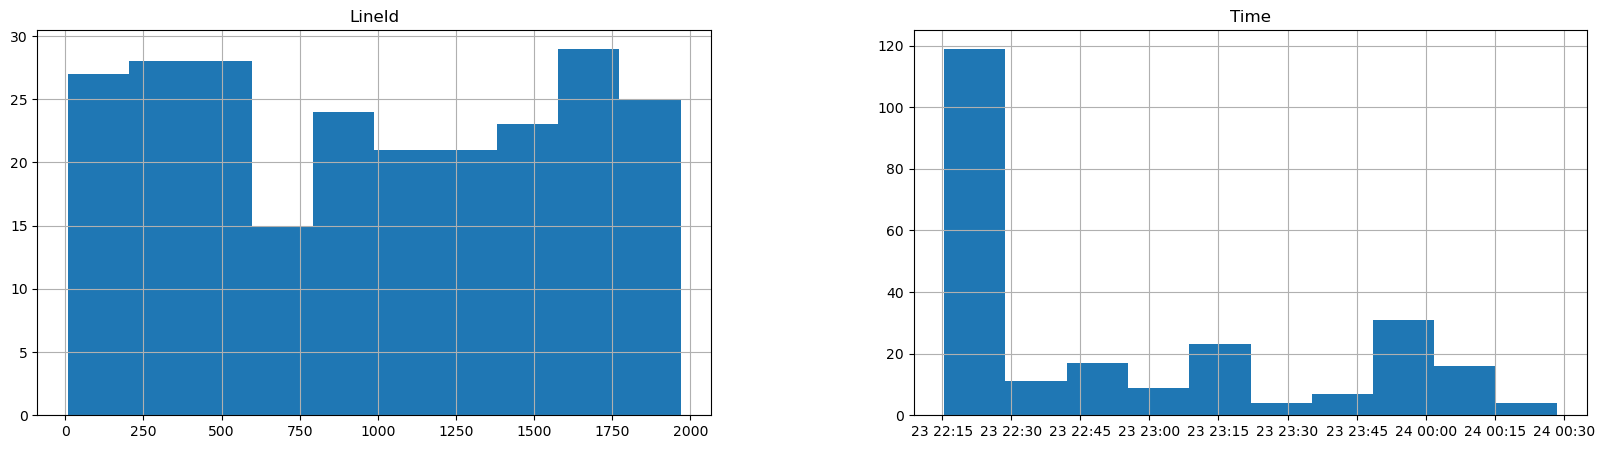

In [10]:
df.hist(figsize=(20,5))

In [11]:
sorted_df = df.sort_values(by='Time')

array([[<Axes: title={'center': 'LineId'}>,
        <Axes: title={'center': 'Time'}>]], dtype=object)

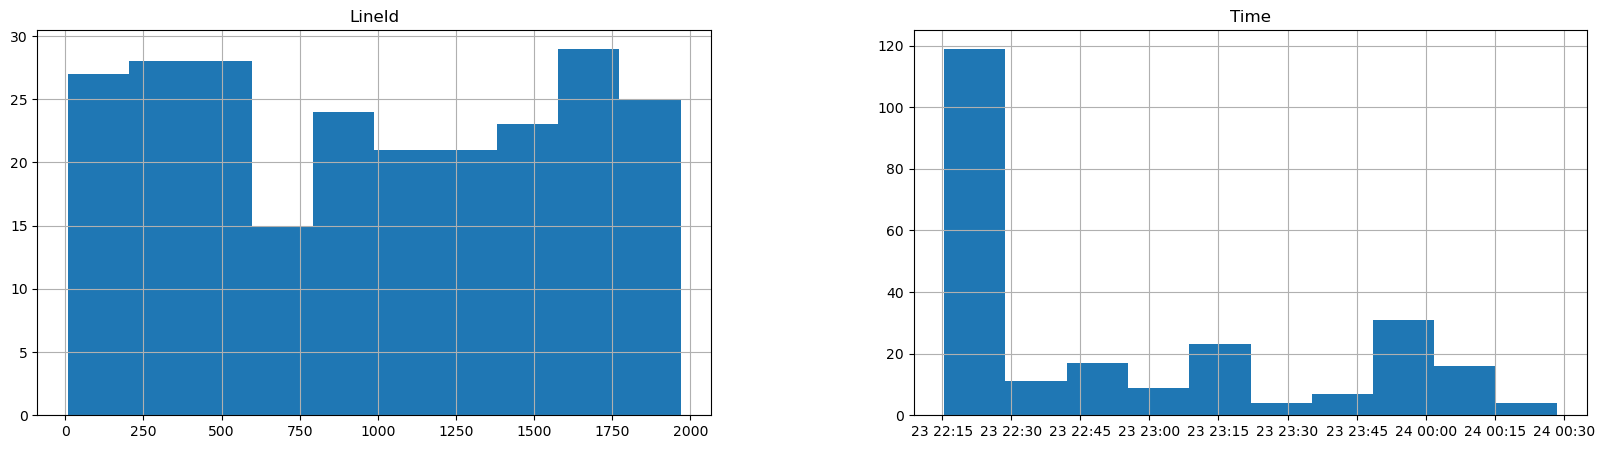

In [12]:
sorted_df.hist(figsize=(20,5))

In [19]:
data2 = 'data/TotalDetailSteps_entry.csv'
df2 = pd.read_csv(data2)

In [20]:
df2.head()

,LineId,Time,Content,EventId,Date
0,7,2017-12-23 22:15:29.636,setTodayTotalDetailSteps=1514038440000##7007##...,E58,2017-12-23
1,17,2017-12-23 22:15:29.950,setTodayTotalDetailSteps=1514038440000##7008##...,E58,2017-12-23
2,24,2017-12-23 22:15:30.632,setTodayTotalDetailSteps=1514038440000##7009##...,E58,2017-12-23
3,31,2017-12-23 22:15:31.143,setTodayTotalDetailSteps=1514038440000##7011##...,E58,2017-12-23
4,38,2017-12-23 22:15:32.147,setTodayTotalDetailSteps=1514038440000##7012##...,E58,2017-12-23


In [21]:
df2['Content'] = df2['Content'].astype(str)

In [28]:
extracted_numbers = df2['Content'].str.extractall(r'(\d+)').unstack()

In [29]:
extracted_numbers.columns = [f'Number_{i}' for i in range(extracted_numbers.shape[1])]

In [37]:
extracted_numbers.head()
#extracted_numbers.dtypes
#extracted_numbers.co


,Number_0,Number_1,Number_2,Number_3,Number_4,Number_5
0,1514038440000,7007,548365,8661,12361,27173954
1,1514038440000,7008,548365,8661,12456,27174269
2,1514038440000,7009,548365,8661,12551,27174951
3,1514038440000,7011,548365,8661,12646,27175461
4,1514038440000,7012,548365,8661,12741,27176464


In [40]:
#extracted_numbers.columns
cols = ['Number_0', 'Number_1', 'Number_2', 'Number_3', 'Number_4', 'Number_5'] 
for items in cols :
    extracted_numbers[items] = pd.to_numeric(df[items])

KeyError: 'Number_0'

In [ ]:
df3 = pd.concat(['df2', 'extracted_numbers'], axis=1)